In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

In [3]:
df = pd.read_csv("Customer-Churn.csv")

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df = df.drop(columns=["customerID"])

df["TotalCharges"] = df["TotalCharges"].replace({" " : "0.0"}).astype(float)

df.shape

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df["Churn"].value_counts()

print(f"Class Imbalance Ratio: {df['Churn'].value_counts()[0] / df['Churn'].value_counts()[1]:.2f}:1")

Class Imbalance Ratio: 2.77:1


### # Churn by contract Plot

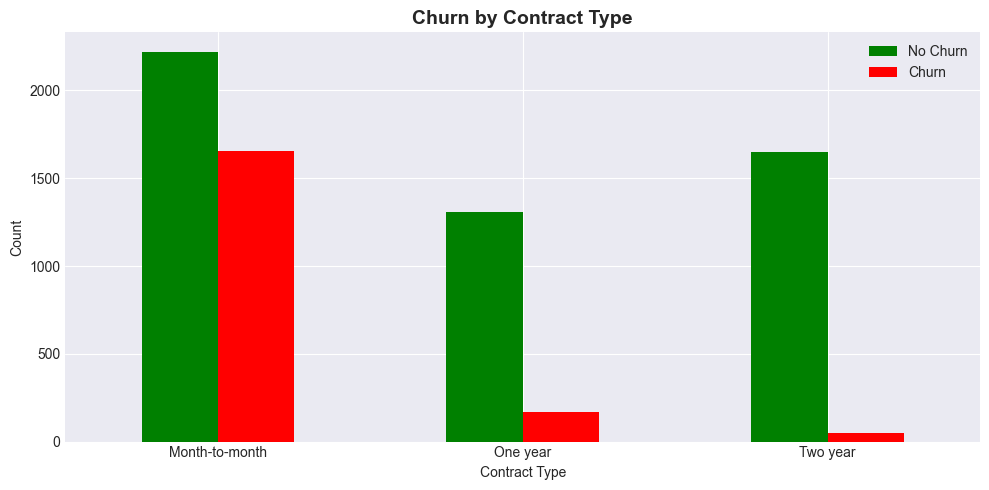

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)
contract_churn.plot(kind='bar', stacked=False, ax=ax, color=['g', 'r'])
ax.set_title('Churn by Contract Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Contract Type')
ax.set_ylabel('Count')
ax.legend(['No Churn', 'Churn'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()


## Encoding

In [7]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

categorical_cols = ['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

encoders = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

In [8]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=42)

x_train.shape[0]


5634

In [9]:
x_test.shape[0]

1409

### STOME

In [10]:
smote = SMOTE(random_state=42)

x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)


#before Smote
dict(y_train.value_counts())


{0: np.int64(4139), 1: np.int64(1495)}

In [11]:
#After Smote
dict(pd.Series(y_train_balanced).value_counts())

{0: np.int64(4139), 1: np.int64(4139)}

## Model Fit

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_train_balanced, y_train_balanced)

y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)

train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

print("Logistic Regression - Train Accuracy:", train_acc_lr)
print("Logistic Regression - Test Accuracy:", test_acc_lr)


Logistic Regression - Train Accuracy: 0.7614483493077743
Logistic Regression - Test Accuracy: 0.751596877217885


In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(x_train_balanced, y_train_balanced)

y_train_pred_svm = svm.predict(x_train)
y_test_pred_svm = svm.predict(x_test)

train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)

print("SVM - Train Accuracy:", train_acc_svm)
print("SVM - Test Accuracy:", test_acc_svm)


SVM - Train Accuracy: 0.679623713170039
SVM - Test Accuracy: 0.6919801277501775


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train_balanced, y_train_balanced)

y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)

train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)

print("Decision Tree - Train Accuracy:", train_acc_dt)
print("Decision Tree - Test Accuracy:", test_acc_dt)


Decision Tree - Train Accuracy: 0.7736954206602769
Decision Tree - Test Accuracy: 0.7686302342086586


In [15]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

xgb_model.fit(x_train_balanced, y_train_balanced)

y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Training Accuracy', train_acc)
print('Test Accuracy', test_acc)

Training Accuracy 0.8258785942492013
Test Accuracy 0.7686302342086586


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train_balanced, y_train_balanced)

y_train_pred1 = rf.predict(x_train)
y_test_pred1 = rf.predict(x_test)

train_acc1 = accuracy_score(y_train, y_train_pred1)
test_acc1 = accuracy_score(y_test, y_test_pred1)

print('Training Accuracy', train_acc1)
print('Test Accuracy', test_acc1)

Training Accuracy 0.7674831380901669
Test Accuracy 0.7565649396735273


## Best Accuracy of XGBClassifier  model

##### Save Model

In [17]:

import pickle

pickle.dump(xgb_model, open('model.pkl', 'wb'))
pickle.dump(encoders, open('encoders.pkl','wb'))
